# Real or Not? NLP with Disaster Tweets - Kaggle Solution

#### using basic NLP techniques

### Kaggle Information

#### Welcome to one of our Getting Started machine learning competitions.
This particular challenge is perfect for data scientists looking to get started with Natural Language Processing. The competition dataset is not too big, and even if you don’t have much personal computing power, you can do all of the work in our free, no-setup, Jupyter Notebooks environment called Kaggle Notebooks.

#### Competition Description
Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies). But, it’s not always clear whether a person’s words are actually announcing a disaster. 


#### Example
Take this example:

The author explicitly uses the word “ABLAZE” but means it metaphorically. This is clear to a human right away, especially with the visual aid. But it’s less clear to a machine.


#### Project Task
In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. If this is your first time working on an NLP problem, we've created a quick tutorial to get you up and running.

#### Disclaimer 
The dataset for this competition contains text that may be considered profane, vulgar, or offensive.

#### Acknowledgments
This dataset was created by the company figure-eight and originally shared on their ‘Data For Everyone’ website here.

#### Tweet source 
https://twitter.com/AnyOtherAnnaK/status/629195955506708480

#### Evaluation
Submissions are evaluated using F1 between the predicted and expected answers.

F1 is calculated as follows:
F1 = 2∗precision∗recall/precision+recall

where:

precision = TP/TP+FP
recall = TP/TP+FN

and:

True Positive [TP] = your prediction is 1, and the ground truth is also 1 - you predicted a positive and that's true!
False Positive [FP] = your prediction is 1, and the ground truth is 0 - you predicted a positive, and that's false.
False Negative [FN] = your prediction is 0, and the ground truth is 1 - you predicted a negative, and that's false.

#### Submission File
For each ID in the test set, you must predict 1 if the tweet is describing a real disaster, and 0 otherwise. The file should contain a header and have the following format:

id,target

0,0

2,0

3,1

9,0

11,0

### How to proceed with?

The steps are as follows :-
1. Importing Files
2. Data Sourcing and Understanding
3. Data Preprocessing
4. Exploratory Data Analysis
5. Data Cleaning(Basic NLP Techniques)
6. Building Models
7. Model Evaluation
8. Submission File creation


Let's begin!!!

### 1. Importing Files

In [1]:
#numpy, pandas, seaborn, matplotlib
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#style
plt.style.use('ggplot')

#re, nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#spell corrector
from spellchecker import SpellChecker

#collections
from collections import defaultdict
from collections import Counter

#scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#warnings
import warnings
warnings.filterwarnings('ignore')

#os
import os

In [2]:
#pip install -U gensim

In [3]:
#for spell checker module
#!pip install pyspellchecker

We have successfully imported the necessary files for the project!

Aheading to the next step - Sourcing the data.

### 2. Data Sourcing and Understanding

##### Training data

In [4]:
tweet_train = pd.read_csv(r"C:\Users\acer\OneDrive\Desktop\nlp-getting-started/train.csv")
tweet_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
tweet_train.shape

(7613, 5)

In [6]:
tweet_train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [7]:
tweet_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
tweet_train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

##### Testing data

In [9]:
tweet_test = pd.read_csv(r"C:\Users\acer\OneDrive\Desktop\nlp-getting-started/test.csv")
tweet_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
tweet_test.shape

(3263, 4)

In [11]:
tweet_test.columns

Index(['id', 'keyword', 'location', 'text'], dtype='object')

In [12]:
tweet_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [13]:
tweet_test.dtypes

id           int64
keyword     object
location    object
text        object
dtype: object

Proceeding to the most important step before building models!

### 3. Data Preprocessing

###### Analysing the missing values in both (train and test) datasets

In [14]:
#for train data
tweet_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [15]:
#null values on percentage wise
nulltrain = round(100*(tweet_train.isnull().sum()/len(tweet_train.index)), 2)

#taking 50% on majority of NaN values in the column
nulltrain.loc[nulltrain>0]

keyword      0.80
location    33.27
dtype: float64

In [16]:
#for test data
tweet_test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [17]:
#null values on percentage wise
nulltrain = round(100*(tweet_test.isnull().sum()/len(tweet_test.index)), 2)

#taking 50% on majority of NaN values in the column
nulltrain.loc[nulltrain>0]

keyword      0.80
location    33.86
dtype: float64

Almost 33% of location column is missing and very low percentage of keyword column is missing.

###### Handling all the missing values

In [18]:
tweet_train = tweet_train.drop(['id','location','keyword'], axis=1)
tweet_train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [19]:
tweet_train.shape

(7613, 2)

As, we are now known about the missing value amount in the datasets, let's do some EDA!

### 4. Exploratory Data Analysis

Text(0, 0.5, 'samples')

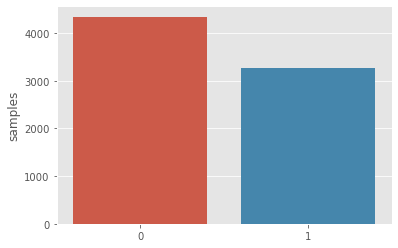

In [20]:
#class distribution
x=tweet_train.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

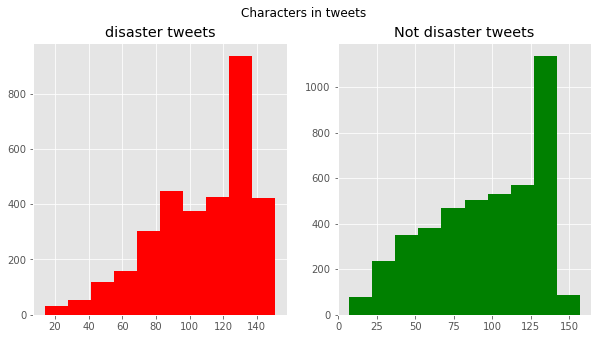

In [21]:
#number of characters in tweets

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

tweet_len=tweet_train[tweet_train['target']==1]['text'].str.len()

ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')

tweet_len=tweet_train[tweet_train['target']==0]['text'].str.len()

ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')

fig.suptitle('Characters in tweets')
plt.show()

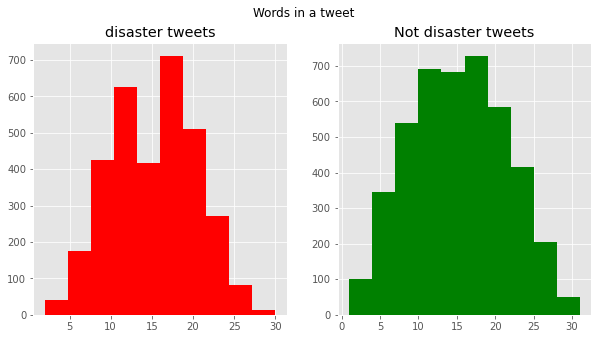

In [22]:
#number of words in the tweets

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

tweet_len=tweet_train[tweet_train['target']==1]['text'].str.split().map(lambda x: len(x))

ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')

tweet_len=tweet_train[tweet_train['target']==0]['text'].str.split().map(lambda x: len(x))

ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')

fig.suptitle('Words in a tweet')
plt.show()

Text(0.5, 0.98, 'Average word length in each tweet')

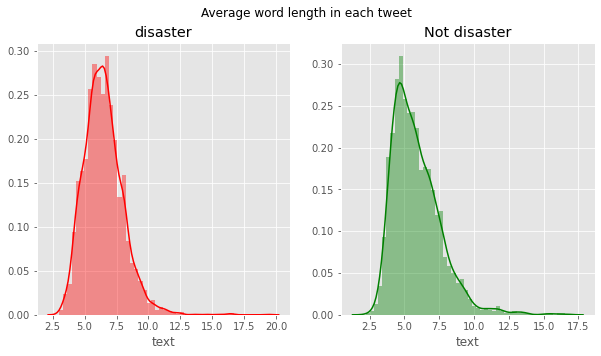

In [23]:
#average word length in a tweet

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

word=tweet_train[tweet_train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])

sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')

word=tweet_train[tweet_train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])

sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')

fig.suptitle('Average word length in each tweet')

###### create corpus

In [24]:
def create_corpus(target):
    corpus=[]
    
    for x in tweet_train[tweet_train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [25]:
#common stopwods in tweets

corpus=create_corpus(0)

#english stopwords
stop=set(stopwords.words('english'))

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

<BarContainer object of 10 artists>

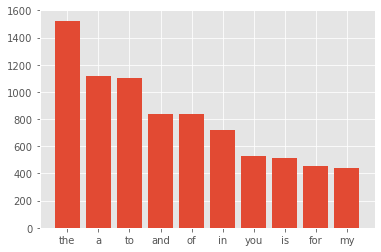

In [26]:
#common stopwods in tweets : plot

x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

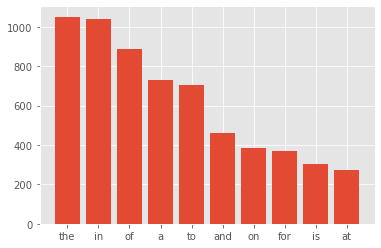

In [27]:
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 18 artists>

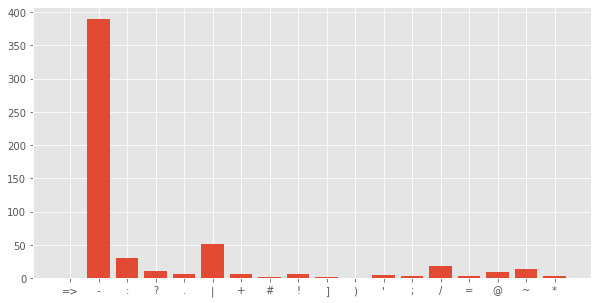

In [28]:
#analysing the punctuations

plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 20 artists>

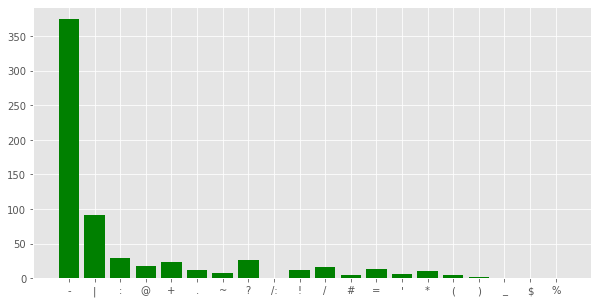

In [29]:
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')

In [30]:
#common words

counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

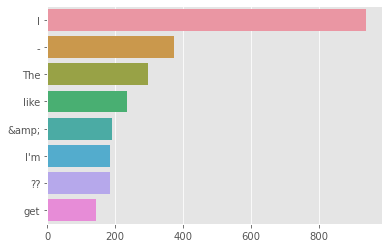

In [31]:
sns.barplot(x=y,y=x)

There are some kind of outliers present due to the presence of the missing values seen earlier. Firstly we need to handle the data via cleaning through some of the NLP techniques.

### 5. Data Cleaning

###### using basic NLP techniques

In [32]:
#concate train and test data
tweet = pd.concat([tweet_train,tweet_test])
tweet.head(10)

,text,target,id,keyword,location
0,Our Deeds are the Reason of this #earthquake M...,1.0,NaN,NaN,NaN
1,Forest fire near La Ronge Sask. Canada,1.0,NaN,NaN,NaN
2,All residents asked to 'shelter in place' are ...,1.0,NaN,NaN,NaN
3,"13,000 people receive #wildfires evacuation or...",1.0,NaN,NaN,NaN
4,Just got sent this photo from Ruby #Alaska as ...,1.0,NaN,NaN,NaN
5,#RockyFire Update => California Hwy. 20 closed...,1.0,NaN,NaN,NaN
6,#flood #disaster Heavy rain causes flash flood...,1.0,NaN,NaN,NaN
7,I'm on top of the hill and I can see a fire in...,1.0,NaN,NaN,NaN
8,There's an emergency evacuation happening now ...,1.0,NaN,NaN,NaN
9,I'm afraid that the tornado is coming to our a...,1.0,NaN,NaN,NaN


In [33]:
tweet.shape

(10876, 5)

In [34]:
#dropping unwanted
tweet = tweet.drop(['id','location','keyword'], axis=1)
tweet.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1.0
1,Forest fire near La Ronge Sask. Canada,1.0
2,All residents asked to 'shelter in place' are ...,1.0
3,"13,000 people receive #wildfires evacuation or...",1.0
4,Just got sent this photo from Ruby #Alaska as ...,1.0


In [35]:
tweet.shape

(10876, 2)

In [36]:
tweet.dtypes

text       object
target    float64
dtype: object

In [37]:
#changing data type of text
tweet['text']=tweet['text'].astype('string')

In [38]:
tweet.dtypes

text       string
target    float64
dtype: object

In [39]:
#changing contraction verb

def change_contraction_verb(text):
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    return text

In [40]:
tweet['text'] = tweet['text'].apply(lambda x : change_contraction_verb(x))
tweet['text'].head(10)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to  ishelter in place' are...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I am on top of the hill and I can see a fire i...
8    There is an emergency evacuation happening now...
9    I am afraid that the tornado is coming to our ...
Name: text, dtype: object

In [41]:
#removing urls
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"
remove_URL(example)

'New competition launched :'

In [42]:
tweet['text'] = tweet['text'].apply(lambda x : remove_URL(x))
tweet['text'].head(10)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to  ishelter in place' are...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I am on top of the hill and I can see a fire i...
8    There is an emergency evacuation happening now...
9    I am afraid that the tornado is coming to our ...
Name: text, dtype: object

In [43]:
#removing HTML tags

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""
print(remove_html(example))


Real or Fake
Kaggle 
getting started



In [44]:
tweet['text'] = tweet['text'].apply(lambda x : remove_html(x))
tweet['text'].head(10)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to  ishelter in place' are...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I am on top of the hill and I can see a fire i...
8    There is an emergency evacuation happening now...
9    I am afraid that the tornado is coming to our ...
Name: text, dtype: object

In [45]:
#removing emojis

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [46]:
tweet['text'] = tweet['text'].apply(lambda x : remove_emoji(x))
tweet['text'].head(10)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to  ishelter in place' are...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I am on top of the hill and I can see a fire i...
8    There is an emergency evacuation happening now...
9    I am afraid that the tornado is coming to our ...
Name: text, dtype: object

In [47]:
#removing punctuations

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #king"
print(remove_punct(example))

I am a king


In [48]:
tweet['text'] = tweet['text'].apply(lambda x : remove_punct(x))
tweet['text'].head(10)

0    Our Deeds are the Reason of this earthquake Ma...
1                Forest fire near La Ronge Sask Canada
2    All residents asked to  ishelter in place are ...
3    13000 people receive wildfires evacuation orde...
4    Just got sent this photo from Ruby Alaska as s...
5    RockyFire Update  California Hwy 20 closed in ...
6    flood disaster Heavy rain causes flash floodin...
7    I am on top of the hill and I can see a fire i...
8    There is an emergency evacuation happening now...
9    I am afraid that the tornado is coming to our ...
Name: text, dtype: object

In [49]:
#remove custom text

def custom_preprocessor(text):
    text = text.lower() #lowercase
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [50]:
tweet['text'] = tweet['text'].apply(lambda x : custom_preprocessor(x))
tweet['text'].head(10)

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to  ishelter in place are ...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
5    rockyfire update  california hwy  closed in bo...
6    flood disaster heavy rain causes flash floodin...
7    i am on top of the hill and i can see a fire i...
8    there is an emergency evacuation happening now...
9    i am afraid that the tornado is coming to our ...
Name: text, dtype: object

In [51]:
tweet_train.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [52]:
tweet.head()

,text,target
0,our deeds are the reason of this earthquake ma...,1.0
1,forest fire near la ronge sask canada,1.0
2,all residents asked to ishelter in place are ...,1.0
3,people receive wildfires evacuation orders in...,1.0
4,just got sent this photo from ruby alaska as s...,1.0


In [53]:

#spell correction
#(!pip install pyspellchecker)

#spell = SpellChecker()

# def correct_spellings(text):
#    corrected_text = []
 #   misspelled_words = spell.unknown(text.split())
 #   for word in text.split():
 #       if word in misspelled_words:
 #           corrected_text.append(spell.correction(word))
 #       else:
  #          corrected_text.append(word)
#  return " ".join(corrected_text)
        
# text = "corect me plese"
# correct_spellings(text)

In [54]:
#tweet['text']=tweet['text'].apply(lambda x : correct_spellings(x))

In [55]:
def lemmatizing(text):
    sentence_words = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemma_noun = []
    for word_noun in sentence_words:
        lemma_noun.append(lemmatizer.lemmatize(word_noun,"n"))
        lemma_noun.append(" ")
    return "".join(lemma_noun)

In [56]:
tweet['text'] = tweet['text'].apply(lambda x : lemmatizing(x))
tweet['text'].head()

0    our deed are the reason of this earthquake may...
1               forest fire near la ronge sask canada 
2    all resident asked to ishelter in place are be...
3    people receive wildfire evacuation order in ca...
4    just got sent this photo from ruby alaska a sm...
Name: text, dtype: object

In [57]:
tweet.head()

,text,target
0,our deed are the reason of this earthquake may...,1.0
1,forest fire near la ronge sask canada,1.0
2,all resident asked to ishelter in place are be...,1.0
3,people receive wildfire evacuation order in ca...,1.0
4,just got sent this photo from ruby alaska a sm...,1.0


In [58]:
#cleaning training dataset

tweet_train['text'] = tweet_train['text'].apply(lambda x : change_contraction_verb(x))
tweet_train['text'] = tweet_train['text'].apply(lambda x : remove_html(x))
tweet_train['text'] = tweet_train['text'].apply(lambda x : remove_punct(x))
tweet_train['text'] = tweet_train['text'].apply(lambda x : lemmatizing(x))
tweet_train['text'] = tweet_train['text'].apply(lambda x : custom_preprocessor(x))
tweet_train['text'] = tweet_train['text'].apply(lambda x : remove_emoji(x))
tweet_train['text'] = tweet_train['text'].apply(lambda x : remove_URL(x))

tweet_train['text'].head(10)

0    our deeds are the reason of this earthquake ma...
1               forest fire near la ronge sask canada 
2    all resident asked to ishelter in place are be...
3     people receive wildfire evacuation order in c...
4    just got sent this photo from ruby alaska a sm...
5    rockyfire update california hwy  closed in bot...
6    flood disaster heavy rain cause flash flooding...
7    i am on top of the hill and i can see a fire i...
8    there is an emergency evacuation happening now...
9    i am afraid that the tornado is coming to our ...
Name: text, dtype: object

In [59]:
#cleaning test dataset

tweet_test['text'] = tweet_test['text'].apply(lambda x : change_contraction_verb(x))
tweet_test['text'] = tweet_test['text'].apply(lambda x : remove_html(x))
tweet_test['text'] = tweet_test['text'].apply(lambda x : remove_punct(x))
tweet_test['text'] = tweet_test['text'].apply(lambda x : lemmatizing(x))
tweet_test['text'] = tweet_test['text'].apply(lambda x : custom_preprocessor(x))
tweet_test['text'] = tweet_test['text'].apply(lambda x : remove_emoji(x))
tweet_test['text'] = tweet_test['text'].apply(lambda x : remove_URL(x))

tweet_test['text'].head(10)

0                  just happened a terrible car crash 
1    heard about earthquake is different city stay ...
2    there is a forest fire at spot pond goose are ...
3                apocalypse lighting spokane wildfire 
4          typhoon soudelor kill  in china and taiwan 
5                   we are shakingit is an earthquake 
6    they would probably still show more life than ...
7                                     hey how are you 
8                                     what a nice hat 
9                                            fuck off 
Name: text, dtype: object

### 6. Building Models

In [60]:
stopwords = stopwords.words('english')

In [61]:
#tf-idf calculation

tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2), stop_words = stopwords)
train_vector = tfidf.fit_transform(tweet_train['text'])
test_vector = tfidf.transform(tweet_test["text"])

In [62]:
#classifier
clf = LogisticRegression(C=1.0)

In [63]:
# Fitting a simple Logistic Regression on Counts
clf.fit(train_vector, tweet_train["target"])

LogisticRegression()

### 7. Model Evaluation

In [64]:
#accuracy scores
scores = model_selection.cross_val_score(clf, train_vector, tweet_train["target"], cv=5, scoring="f1")
print(scores)

[0.5523614  0.49860465 0.53839205 0.45341615 0.66431718]


### 8. Submission File Creation

In [65]:
#read sample submission file
submission = pd.read_csv(r"C:\Users\acer\Downloads\nlp-getting-started\sample_submission.csv")

#update target column in the submission file
submission["target"] = clf.predict(test_vector)

#create submission file
submission.to_csv("submission.csv", index=False)    

In [66]:
submission.head(30)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0
